This Jupyter Notebook goes through the stages required in Python to:
- Import share data from the internet
- Calculate MACD and Signal Line
- Plot the MACD and Signal Line

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mfp
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create Technical Analysis measures EMA_12, EMA_26, MACD and Signal Line

sl_period = 9 #Set signal line period

start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

pdr_bae_data['EMA_12'] = pdr_bae_data['Close'].ewm(span=12,adjust=False).mean()
pdr_bae_data['EMA_26'] = pdr_bae_data['Close'].ewm(span=26,adjust=False).mean()
pdr_bae_data['MACD'] = pdr_bae_data['EMA_12'] - pdr_bae_data['EMA_26']

pdr_bae_data['Signal Line'] = pdr_bae_data['MACD'].ewm(span=sl_period,adjust=False).mean()

pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close,EMA_12,EMA_26,MACD,Signal Line
Date,,,,,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474152,100.918602,100.918602,0.000000,0.000000
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474152,100.918602,100.918602,0.000000,0.000000
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975025,101.144171,101.027210,0.116962,0.023392
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390709,101.071884,101.001068,0.070816,0.032877
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806381,100.747563,100.850159,-0.102596,0.005782
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000,757.931156,750.892411,7.038744,5.622054
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988,759.295591,752.070750,7.224841,5.942612
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976,759.650112,752.776619,6.873493,6.128788


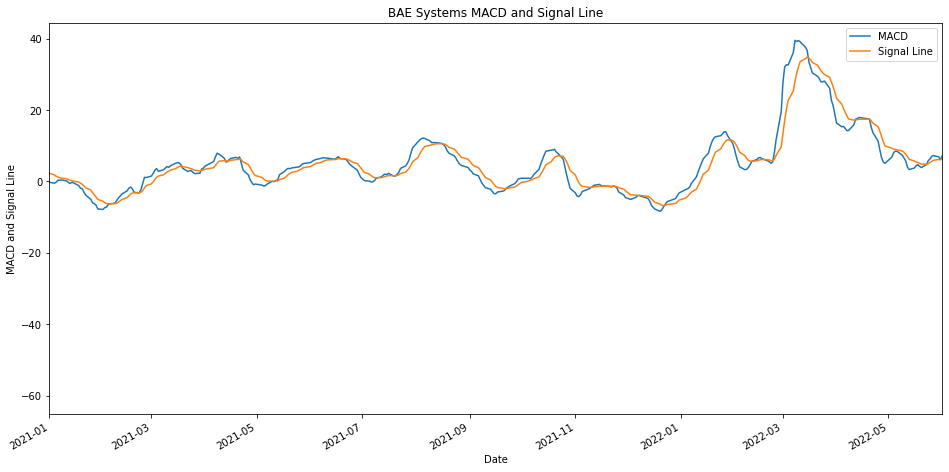

In [3]:
#Plot the various technical measures just evaluated
pdr_bae_data['MACD'].plot(label='MACD',figsize=(16,8))
pdr_bae_data['Signal Line'].plot(label='Signal Line')
_=plt.xlabel('Date')
_=plt.ylabel('MACD and Signal Line')
_=plt.title('BAE Systems MACD and Signal Line')
plt.xlim(datetime(2021,1,1),end) #start x-axis at the start of 2021 so the different series are discernible
plt.legend();